In [1]:
#ElhamMirzaei
#First Dataset
#Data Visualization
#With Preprocessing
import warnings
warnings.filterwarnings("ignore")
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import scipy
from sklearn import datasets
from joblib import dump, load
import matplotlib.pyplot as plt

In [2]:
#reading our data
df=pd.read_csv("HousePrice1.csv")
display(df.head(), df.tail())

,Area,Room,Parking,Warehouse,Elevator,Address,PriceR,PriceM,PriceMC
0,63,1,True,True,True,5.0,1850000000,1850.0,5920.0
1,60,1,True,True,True,5.0,1850000000,1850.0,5920.0
2,79,2,True,True,True,22.0,550000000,550.0,1760.0
3,95,2,True,True,True,6.0,902500000,902.5,2888.0
4,123,2,True,True,True,2.0,7000000000,7000.0,22400.0


,Area,Room,Parking,Warehouse,Elevator,Address,PriceR,PriceM,PriceMC
3184,86,2,True,True,True,1.0,3500000000,3500.0,11200.0
3185,83,2,True,True,True,1.0,6800000000,6800.0,21760.0
3186,75,2,False,False,False,22.0,365000000,365.0,1168.0
3187,105,2,True,True,True,3.0,5600000000,5600.0,17920.0
3188,82,2,False,True,True,22.0,360000000,360.0,1152.0


In [3]:
#describing the dataframe
df.describe()

,Area,Room,Address,PriceR,PriceM,PriceMC
count,3189.000000,3189.000000,3115.000000,3.189000e+03,3189.000000,3189.000000
mean,107.573220,2.080590,7.485072,5.313478e+09,5313.477852,17005.587577
std,71.692726,0.757292,7.311143,8.246810e+09,8246.809753,26388.586781
min,25.000000,0.000000,1.000000,1.080000e+07,10.800000,34.560000
25%,70.000000,2.000000,2.000000,1.349550e+09,1349.550000,4320.000000
50%,90.000000,2.000000,5.000000,2.850000e+09,2850.000000,9120.000000
75%,120.000000,2.000000,10.000000,5.830000e+09,5830.000000,18656.000000
max,929.000000,5.000000,23.000000,9.240000e+10,92400.000000,295680.000000


In [4]:
#finding information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3189 non-null   int64  
 1   Room       3189 non-null   int64  
 2   Parking    3189 non-null   bool   
 3   Warehouse  3189 non-null   bool   
 4   Elevator   3189 non-null   bool   
 5   Address    3115 non-null   float64
 6   PriceR     3189 non-null   int64  
 7   PriceM     3189 non-null   float64
 8   PriceMC    3189 non-null   float64
dtypes: bool(3), float64(3), int64(3)
memory usage: 159.0 KB


In [5]:
#finding the shape of the dataframe
df.shape

(3189, 9)

In [6]:
#data cleaning
df.duplicated(subset = ['Address']).sum()

3169

In [7]:
#finding the missing values(we have null Address)
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      74
PriceR        0
PriceM        0
PriceMC       0
dtype: int64

<Axes: >

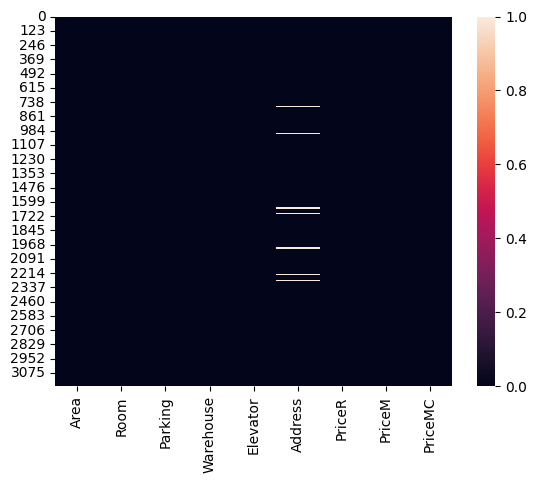

In [8]:
sns.heatmap(df.isnull())

In [9]:
#Remove the null values (houses without Address)
cdf = df.dropna()
df=df.dropna().reset_index(drop=True)
df.drop_duplicates()
#finding the missing values in the new dataframe(now we have not any null)
cdf.isnull().sum()

Area         0
Room         0
Parking      0
Warehouse    0
Elevator     0
Address      0
PriceR       0
PriceM       0
PriceMC      0
dtype: int64

<Axes: >

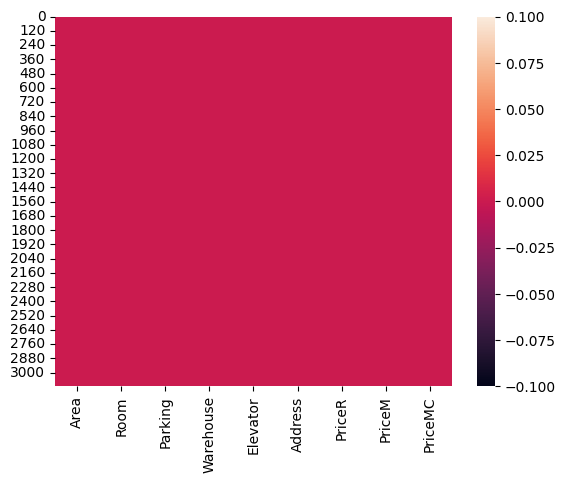

In [10]:
sns.heatmap(df.isnull())

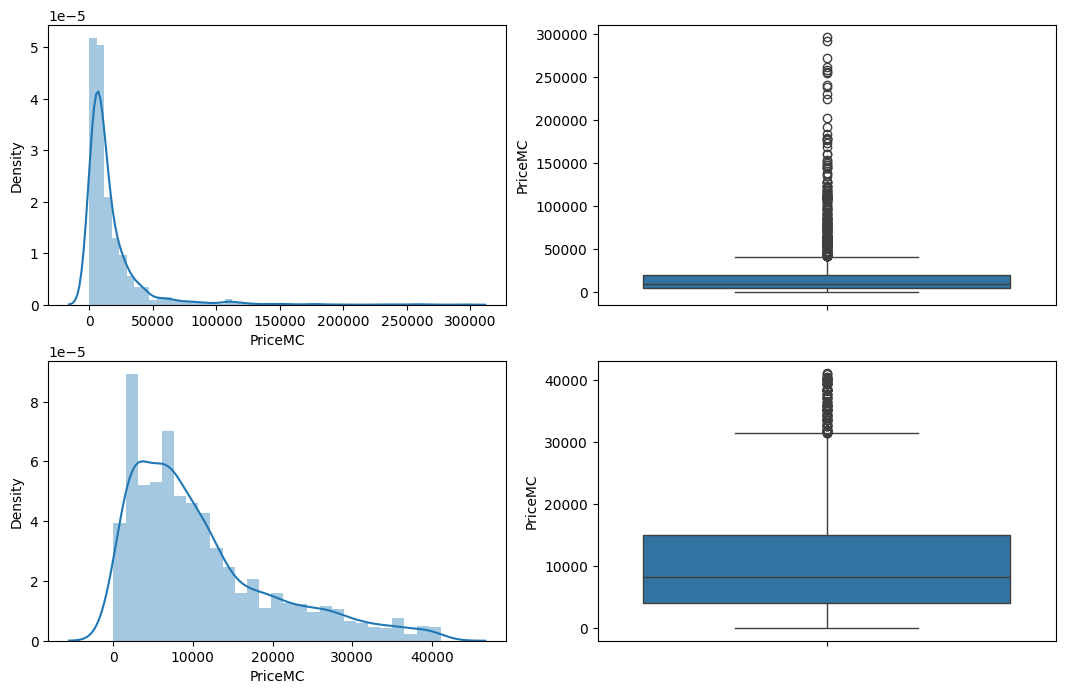

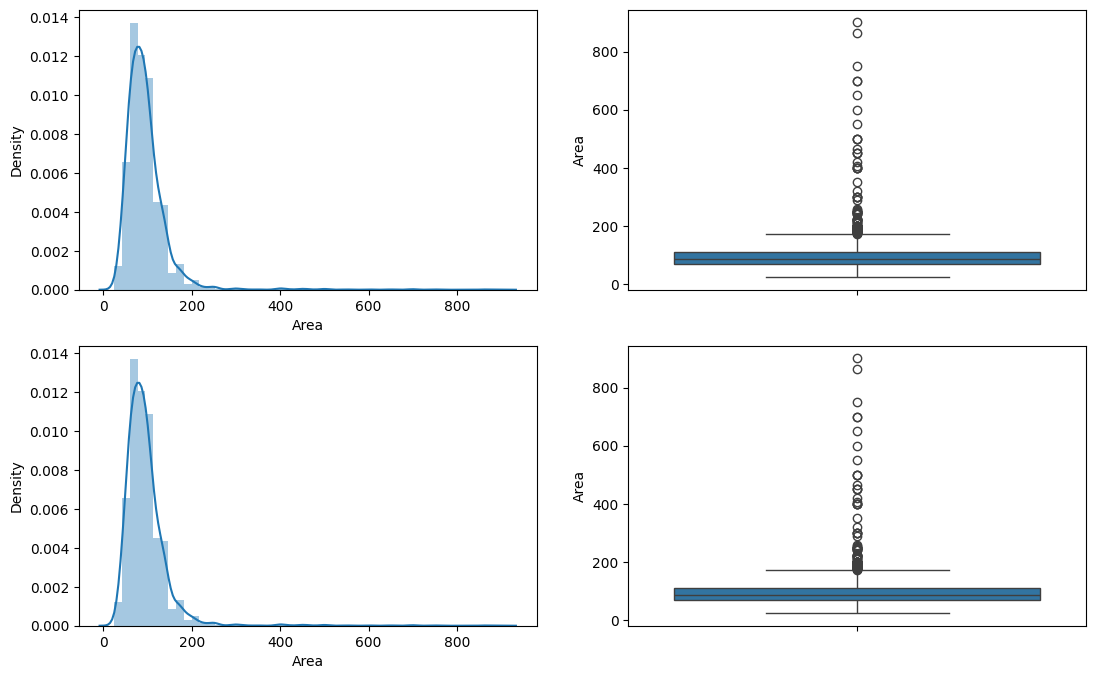

In [11]:
percentile25 = df['PriceMC'].quantile ( 0.25 )
percentile75 = df['PriceMC'].quantile ( 0.75 )
area25=df['Area'].quantile ( 0.25 )
area75=df['Area'].quantile ( 0.75 )
iqr=percentile75 -percentile25
iqrArea=area75 -area25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
upper_limit_area = area75 + 1.5 * iqrArea
lower_limit_area = area25 - 1.5 * iqrArea
new_df =df[df['PriceMC'] < upper_limit]
new_df=new_df[new_df['PriceMC'] > lower_limit]
new_df =new_df[new_df['PriceMC'] < upper_limit]
new_df = new_df [new_df ['PriceMC'] > lower_limit]
plt.figure(figsize=(13,8))
plt.subplot ( 2,2,1 )
sns.distplot(df['PriceMC'])
plt.subplot ( 2,2,2 )
sns.boxplot(df['PriceMC'])
plt.subplot ( 2,2,3 )
sns.distplot(new_df['PriceMC'])
plt.subplot ( 2,2,4 )
sns.boxplot(new_df['PriceMC'])
plt.show()
plt.figure(figsize=(13,8))
plt.subplot ( 2,2,1 )
sns.distplot(new_df['Area'])
plt.subplot ( 2,2,2 )
sns.boxplot(new_df['Area'])
plt.subplot ( 2,2,3 )
sns.distplot(new_df['Area'])
plt.subplot ( 2,2,4 )
sns.boxplot(new_df['Area'])
plt.show()

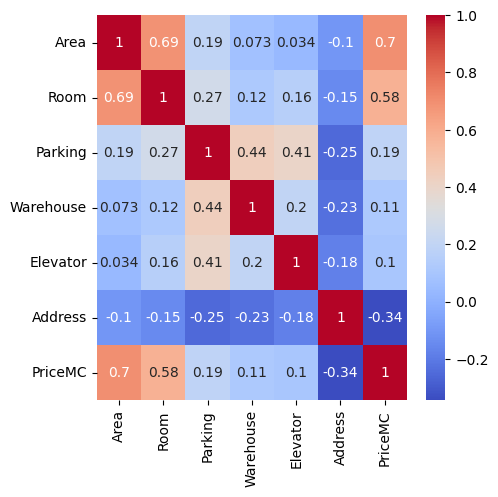

In [12]:
#Heat map visualization
df = df.drop(['PriceM', 'PriceR'], axis=1)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


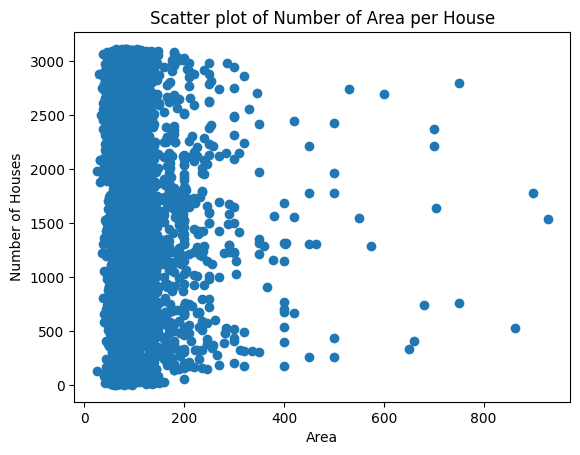

In [13]:
#see outliers of Area on our primary data (df)
plt.scatter(df['Area'], df.index)
plt.xlabel('Area')
plt.ylabel('Number of Houses')
plt.title('Scatter plot of Number of Area per House')
plt.show()

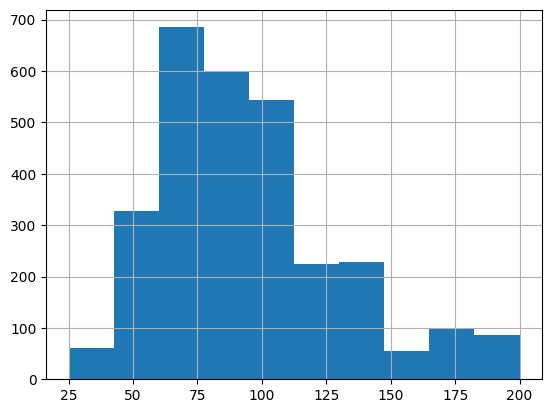

In [14]:
#remove outliers of Area(less than 25 & more than 200)
cdf.loc[:, 'Area'] = pd.to_numeric(cdf['Area'], errors='coerce')
cdf.loc[:, 'Area'] = cdf.loc[:, 'Area'].apply(lambda x: x if (x >= 25 and x <= 200) else np.nan)
cdf = cdf.dropna(subset=['Area'])

#bar plot visualization
viz = (cdf.Area)
viz.hist()
plt.show()
# MAX AREA:75

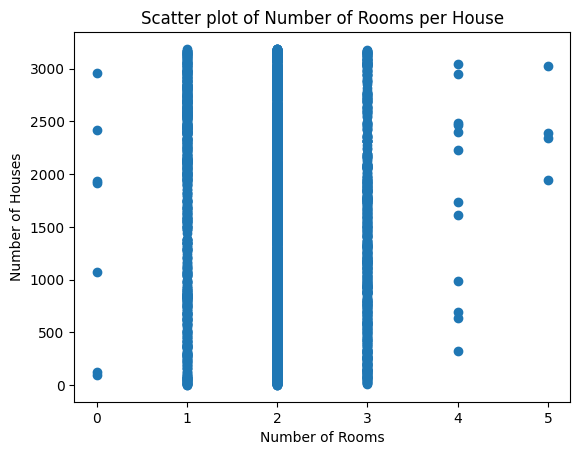

In [15]:
plt.scatter(cdf['Room'], cdf.index)
plt.xlabel('Number of Rooms')
plt.ylabel('Number of Houses')
plt.title('Scatter plot of Number of Rooms per House')
plt.show()
# MAX ROOM:2

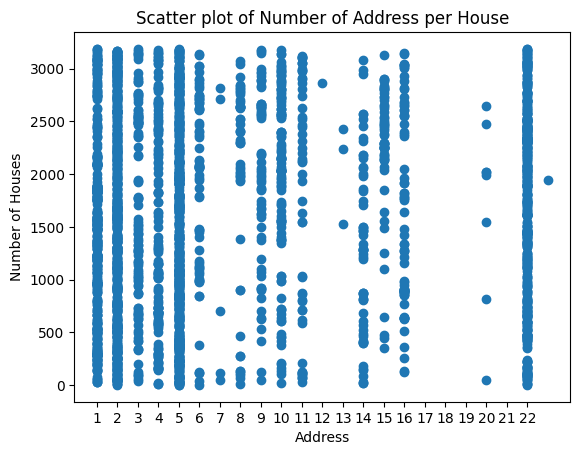

In [16]:
plt.scatter(cdf['Address'], cdf.index)
plt.xlabel('Address')
plt.ylabel('Number of Houses')
plt.title('Scatter plot of Number of Address per House')
plt.xticks(range(1, 23))
plt.show()
# MAX ADDRESS: 5

In [17]:
#show x&y columns
cdf = cdf[['Area' , 'Room' , 'Address' , 'PriceMC']]
cdf.head()

,Area,Room,Address,PriceMC
0,63.0,1,5.0,5920.0
1,60.0,1,5.0,5920.0
2,79.0,2,22.0,1760.0
3,95.0,2,6.0,2888.0
4,123.0,2,2.0,22400.0


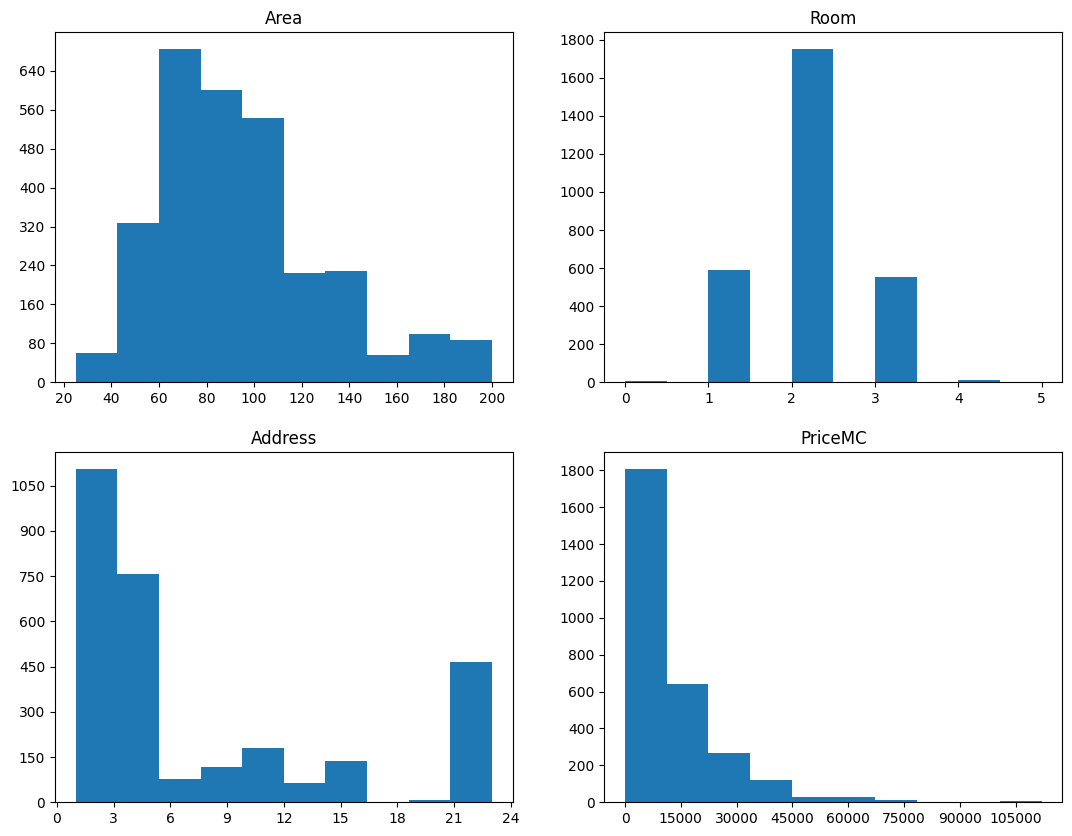

In [18]:
#bar plot visualization
viz = cdf[['Area' , 'Room' , 'Address' , 'PriceMC']]
fig, axs = plt.subplots(2, 2, figsize=(13, 10))
axs[0, 0].hist(viz['Area'], bins=10)
axs[0, 0].set_title('Area')
axs[0, 1].hist(viz['Room'], bins=10)
axs[0, 1].set_title('Room')
axs[1, 0].hist(viz['Address'], bins=10)
axs[1, 0].set_title('Address')
axs[1, 1].hist(viz['PriceMC'], bins=10)
axs[1, 1].set_title('PriceMC')
for ax in axs.flat:
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()


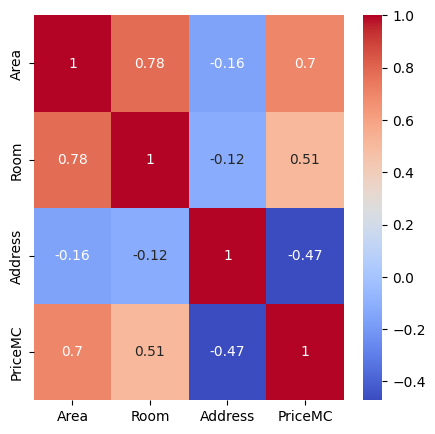

In [19]:
#Heat map visualization
for col in cdf.columns:
    cdf[col] = pd.to_numeric(cdf[col], errors='coerce')

plt.figure(figsize=(5,5))
sns.heatmap(cdf.corr(), annot=True, cmap='coolwarm')
plt.show()

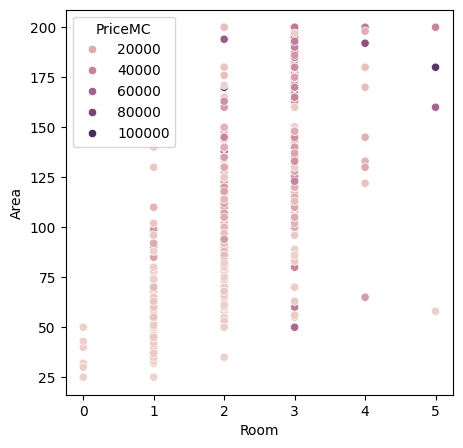

In [20]:
plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(as_cmap=True)
scatter = sns.scatterplot(x='Room', y='Area', hue='PriceMC', palette=cmap, data=cdf)
plt.show()

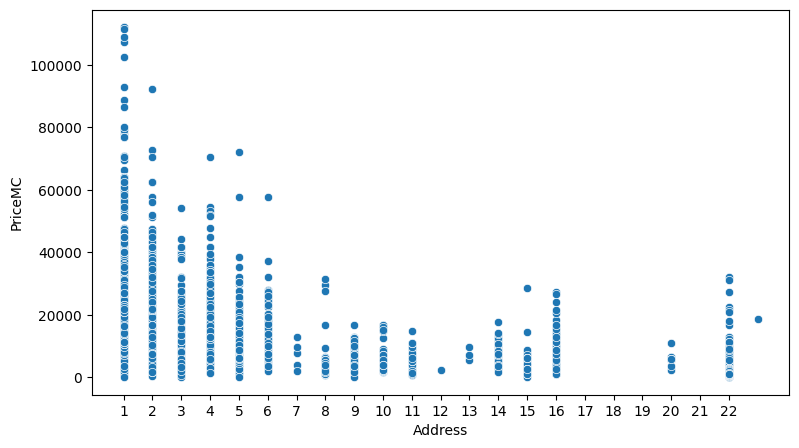

In [21]:
plt.figure(figsize=(9, 5))
cmap = sns.cubehelix_palette(as_cmap=True)
scatter = sns.scatterplot(x='Address', y='PriceMC', palette=cmap, data=cdf)
plt.xticks(range(1, 23))
plt.show()

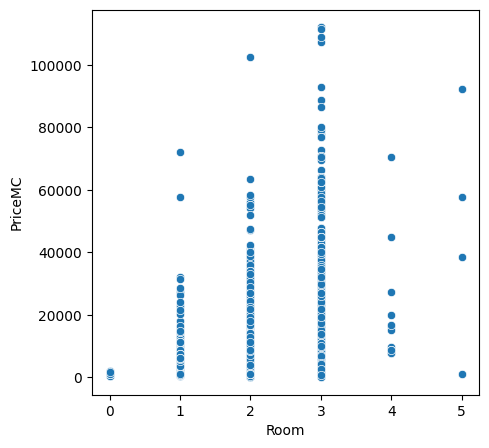

In [22]:
plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(as_cmap=True)
scatter = sns.scatterplot(x='Room', y='PriceMC', palette=cmap, data=cdf)
plt.show()

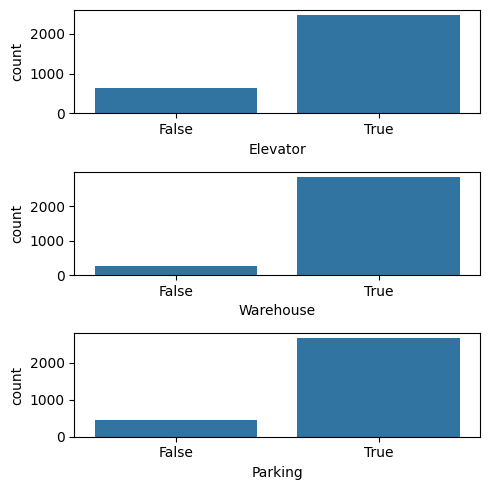

In [23]:
fig, axs = plt.subplots(3, figsize=(5, 5))
# نمودار پراکندگی برای Elevator
sns.countplot(x='Elevator', data=df, ax=axs[0])
# نمودار پراکندگی برای Warehouse
sns.countplot(x='Warehouse', data=df, ax=axs[1])
# نمودار پراکندگی برای Parking
sns.countplot(x='Parking', data=df, ax=axs[2])
plt.tight_layout()
plt.show()
# MAX:YES

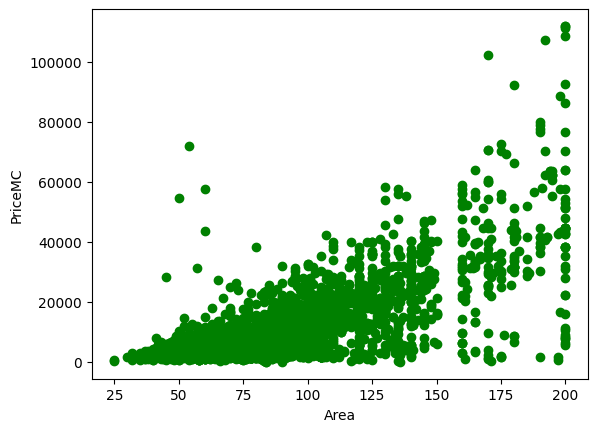

In [24]:
#Best Scatter plot
plt.scatter(cdf.Area , cdf.PriceMC , color='green')
plt.xlabel("Area")
plt.ylabel("PriceMC")
plt.show()

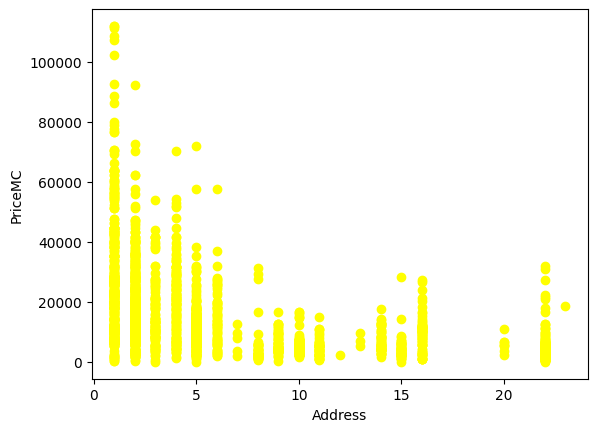

In [25]:
#Good Scatter plot
plt.scatter(cdf.Address , cdf.PriceMC , color='yellow')
plt.xlabel("Address")
plt.ylabel("PriceMC")
plt.show()

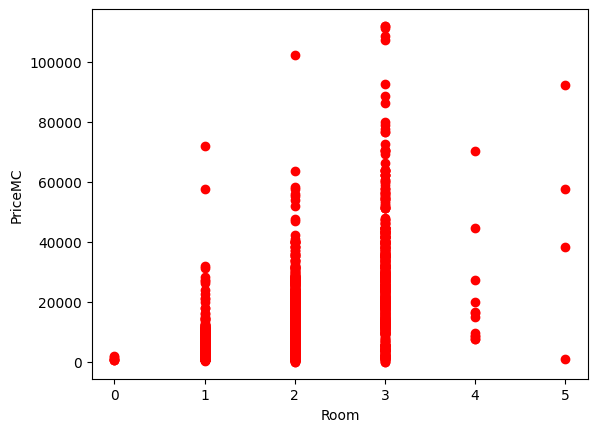

In [26]:
#Worst Scatter plot
plt.scatter(cdf.Room , cdf.PriceMC , color='red')
plt.xlabel("Room")
plt.ylabel("PriceMC")
plt.show()